# 🌱GreenLens AI: Lifestyle Sustainability Analyzer

This project uses AI-inspired reasoning to analyze daily lifestyle choices, estimate carbon footprint, and provide personalized sustainability recommendations.

**Goal:**  
To encourage sustainable behavior using explainable AI logic rather than black-box predictions.

**Key Features:**  
- Calculates total daily carbon emissions
- Scores sustainability based on high-impact habits
- Generates actionable AI recommendations
- Visualizes activity-wise emissions


In [10]:
# Core libraries for data handling and visualization

import pandas as pd
import matplotlib.pyplot as plt


In [12]:


# Creating a simplified dataset of lifestyle activities and their estimated CO2 emissions
data = {
    "Activity": [
        "Car Travel", "Bus Travel", "Cycling",
        "Low Electricity", "Medium Electricity", "High Electricity",
        "Vegetarian Food", "Non-Vegetarian Food",
        "Low Plastic Use", "Medium Plastic Use", "High Plastic Use"
    ],
    "CO2_kg_per_day": [
        4.6, 2.1, 0,
        1.2, 3.5, 6.0,
        1.5, 3.3,
        0.5, 1.5, 3.0
    ]
}

df = pd.DataFrame(data)
df


,Activity,CO2_kg_per_day
0,Car Travel,4.6
1,Bus Travel,2.1
2,Cycling,0.0
3,Low Electricity,1.2
4,Medium Electricity,3.5
5,High Electricity,6.0
6,Vegetarian Food,1.5
7,Non-Vegetarian Food,3.3
8,Low Plastic Use,0.5
9,Medium Plastic Use,1.5


 Data Source & Assumptions

The emission factors used in this project are approximate values derived from publicly available sustainability studies such as IPCC reports, EPA guidelines, and environmental research literature.

The dataset is simplified and normalized for educational and AI-demonstration purposes.  
Actual carbon emissions may vary depending on geography, technology, and individual behavior.


In [13]:


# Defined a simulated user lifestyle profile as input for the AI analysis
lifestyle_profile = {
    "transport": "Car Travel",
    "electricity": "High Electricity",
    "food": "Non-Vegetarian Food",
    "plastic": "High Plastic Use"
}

lifestyle_profile


{'transport': 'Car Travel',
 'electricity': 'High Electricity',
 'food': 'Non-Vegetarian Food',
 'plastic': 'High Plastic Use'}

In [14]:


# Function to calculate total carbon footprint and breakdown for each activity
def calculate_carbon_footprint(user_data, dataset):
    total_carbon = 0
    carbon_breakdown = {}

    for choice in user_data.values():
        emission = dataset.loc[
            dataset["Activity"] == choice,
            "CO2_kg_per_day"
        ].values[0]

        carbon_breakdown[choice] = emission
        total_carbon += emission

    return total_carbon, carbon_breakdown

daily_carbon, carbon_breakdown = calculate_carbon_footprint(
    lifestyle_profile, df
)

daily_carbon, carbon_breakdown


(np.float64(16.9),
 {'Car Travel': np.float64(4.6),
  'High Electricity': np.float64(6.0),
  'Non-Vegetarian Food': np.float64(3.3),
  'High Plastic Use': np.float64(3.0)})

In [15]:
# Analyzing user habits to compute sustainability score and detect high-impact behaviors
def analyze_habits(user_data):
    score = 100
    sustainability_flags = []

    if "Car" in user_data["transport"]:
        score -= 25
        sustainability_flags.append("High carbon transport usage detected")

    if "Non-Vegetarian" in user_data["food"]:
        score -= 20
        sustainability_flags.append("Diet has higher carbon footprint")

    if "High Plastic" in user_data["plastic"]:
        score -= 15
        sustainability_flags.append("Excessive plastic consumption")

    return score, sustainability_flags

sustainability_score, sustainability_flags = analyze_habits(lifestyle_profile)
sustainability_score, sustainability_flags


(40,
 ['High carbon transport usage detected',
  'Diet has higher carbon footprint',
  'Excessive plastic consumption'])

In [16]:
# Generating AI-driven recommendations based on detected sustainability issues
def generate_recommendations(flags):
    recommendations = []

    for issue in flags:
        if "transport" in issue.lower():
            recommendations.append(
                "Use public transport or cycling at least twice a week to reduce emissions."
            )
        if "diet" in issue.lower():
            recommendations.append(
                "Incorporate more plant-based meals to lower dietary carbon footprint."
            )
        if "plastic" in issue.lower():
            recommendations.append(
                "Switch to reusable bags and containers to reduce plastic waste."
            )

    if not recommendations:
        recommendations.append(
            "Excellent sustainability habits detected. Keep it up!"
        )

    return recommendations

recommendations = generate_recommendations(sustainability_flags)
recommendations


['Use public transport or cycling at least twice a week to reduce emissions.',
 'Incorporate more plant-based meals to lower dietary carbon footprint.',
 'Switch to reusable bags and containers to reduce plastic waste.']

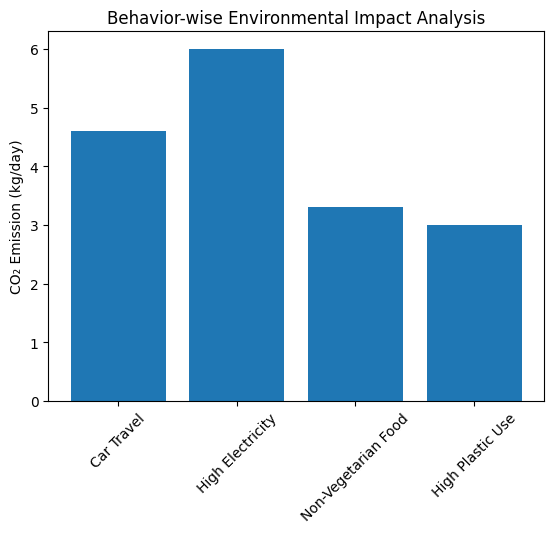

In [17]:
# Creating a bar chart to visualize activity-wise carbon footprint
plt.figure()
plt.bar(carbon_breakdown.keys(), carbon_breakdown.values())
plt.xticks(rotation=45)
plt.ylabel("CO₂ Emission (kg/day)")
plt.title("Behavior-wise Environmental Impact Analysis")
plt.show()


In [19]:
# Displaying final report: total emissions, sustainability score, issues, and recommendations
print(" Total Daily CO₂ Emission:", daily_carbon, "kg")
print(" Sustainability Score:", sustainability_score, "/ 100")

print("\n Identified Issues:")
for issue in sustainability_flags:
    print("-", issue)

print("\n AI Recommendations:")
for rec in recommendations:
    print("-", rec)


 Total Daily CO₂ Emission: 16.9 kg
 Sustainability Score: 40 / 100

 Identified Issues:
- High carbon transport usage detected
- Diet has higher carbon footprint
- Excessive plastic consumption

 AI Recommendations:
- Use public transport or cycling at least twice a week to reduce emissions.
- Incorporate more plant-based meals to lower dietary carbon footprint.
- Switch to reusable bags and containers to reduce plastic waste.
